# Bitcoin Price Prediction : Séries Temporelles avec Pandas, NumPy et Scikit-learn

## 1. Importation des bibliothèques 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Chargement et exploration des données

### Dans cette étape, nous chargerons les données Bitcoin, explorons leur stucture , et verifions la qualité des données

In [4]:
# Chargement des données
données = pd.read_csv("btcusd_1-min_data.csv")

# Aperçu des données
print(données.head())
print(données.info())
print(données.describe())

# Conversion de la colonne timestamp
données['Timestamp'] = pd.to_datetime(données['Timestamp'], unit = 's')
données = données.set_index('Timestamp')




      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728281 entries, 0 to 6728280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 308.0 MB
None
          Timestamp          Open          High           Low         Close  \
count  6.728280e+06  6.728281e+06  6.728281e+06  6.728281e+06  6.728281e+06   
mean   1.527300e+09  1.444758e+04  1.445382e+04  1.444115e+04  1.444761e+04   
std    1.165806e+08  1.947373e+04  1.948126e+04  1.946607e+04  1.947382e+04   
min    1.325412e+09  3.800000e+00  3.80

## 3. Visualisation des données

### Nous analysons l'evolution des prix et des volumes échangés pour identifier des tendances dans les données

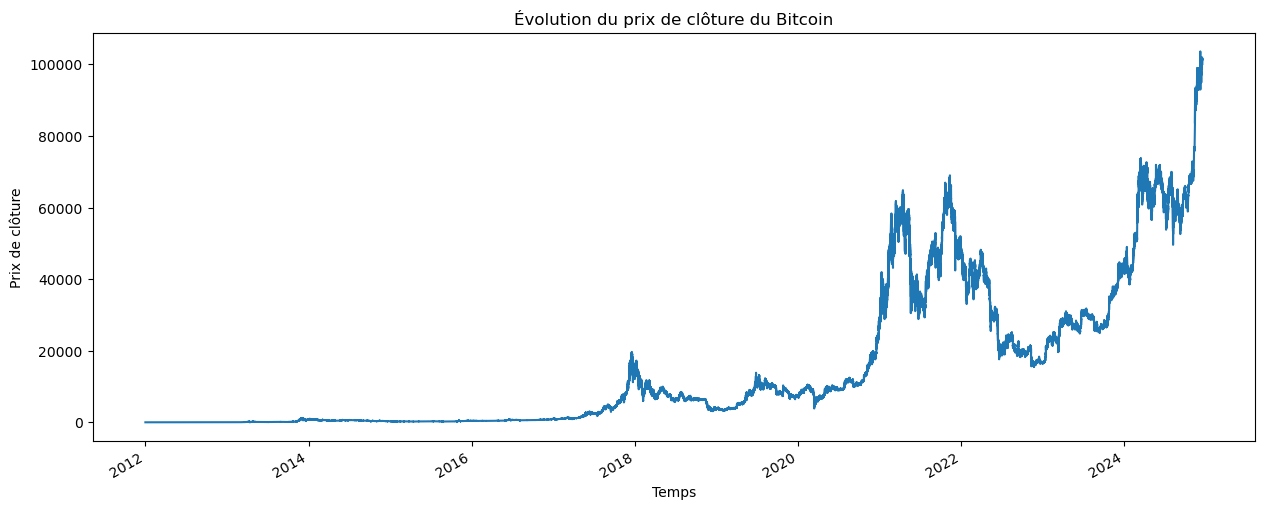

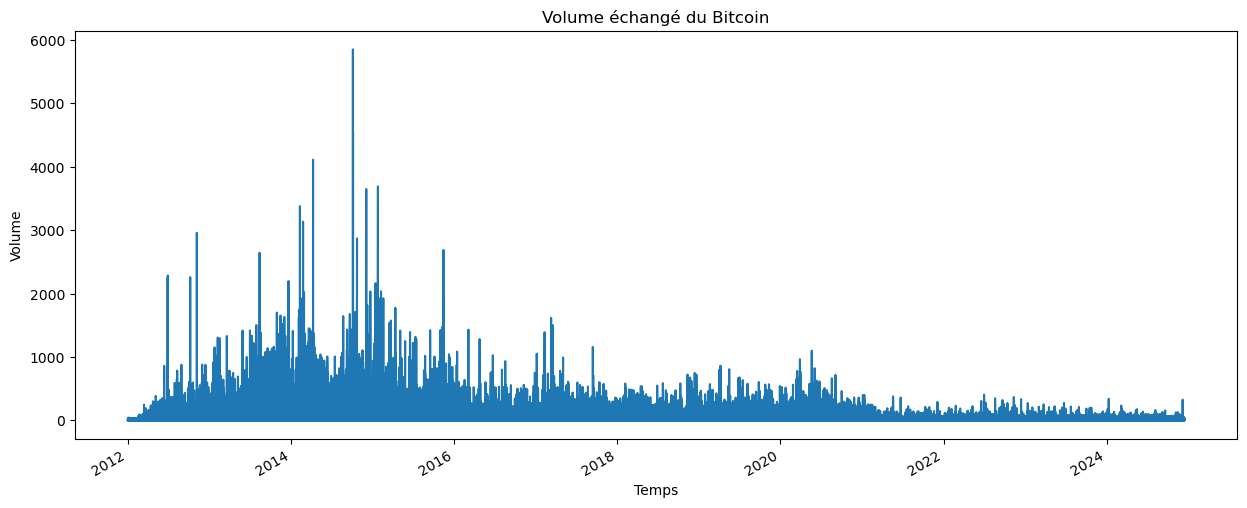

In [7]:
# Visualiser le prix de clôture
données['Close'].plot(figsize=(15, 6), title="Évolution du prix de clôture du Bitcoin")
plt.xlabel("Temps")
plt.ylabel("Prix de clôture")
plt.show()

# Visualisation du volume échangé
données['Volume'].plot(figsize=(15, 6), title="Volume échangé du Bitcoin")
plt.xlabel("Temps")
plt.ylabel("Volume")
plt.show()

## 4. Création des caractéristiques (Feature Engineering) 

### Nous créons des caractéristiques importantes telles que les variations de prix, les moyennes mobiles et la volatilité 

In [10]:
# Variation des prix
données['price_change'] = données['Close'].pct_change()

# Moyennes mobiles
données['mb_5'] = données['Close'].rolling(window=5).mean()
données['mb_10'] = données['Close'].rolling(window=10).mean()

# Volatilité (écart type)
données['volatility'] = données['Close'].rolling(window=10).std()

# Volume relatif
données['volume_rel'] = données['Volume'] / données['Volume'].mean()

# Cible : Le prix augmente-t-il dans 10 minutes ?
données['target'] = (données['Close'].shift(-10) > données['Close']).astype(int)

# Afficher les nouvelles colonnes
print(données.tail())

                         Open      High       Low     Close    Volume  \
Timestamp                                                               
2024-12-13 23:57:00  101489.0  101489.0  101489.0  101489.0  0.031550   
2024-12-13 23:58:00  101461.0  101480.0  101461.0  101480.0  0.000289   
2024-12-13 23:59:00  101459.0  101459.0  101435.0  101435.0  0.055575   
2024-12-14 00:00:00  101433.0  101433.0  101413.0  101433.0  0.087311   
NaT                   57854.0   57864.0   57835.0   57835.0  1.353466   

                     price_change      mb_5     mb_10    volatility  \
Timestamp                                                             
2024-12-13 23:57:00      0.000542  101403.6  101349.7     73.694638   
2024-12-13 23:58:00     -0.000089  101435.6  101363.8     84.164916   
2024-12-13 23:59:00     -0.000443  101447.6  101376.2     84.654591   
2024-12-14 00:00:00     -0.000020  101454.2  101390.0     81.121306   
NaT                     -0.429821   92734.4   97046.4  13777.6

##  5. Préparation des données

### Nous supprimons les valeurs manquantes et séparons les données en variables explicatives et cible

In [13]:
# Supprimer les valeurs manquantes
données = données.dropna()

# Définir les features (X) et la cible (y)
X = données[['price_change', 'mb_5', 'mb_10', 'volatility', 'volume_rel']]
y = données['target']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train)

                     price_change       mb_5      mb_10  volatility  \
Timestamp                                                             
2017-11-23 13:20:00     -0.000875   8118.244   8107.303   18.154771   
2020-04-02 23:10:00      0.001082   6806.072   6791.095   23.247810   
2019-11-14 12:23:00     -0.000840   8665.886   8670.934    7.063336   
2017-09-10 19:58:00     -0.000114   4137.932   4136.401    5.038839   
2020-01-10 02:21:00      0.002110   7811.642   7818.228    8.521756   
...                           ...        ...        ...         ...   
2020-03-09 01:02:00     -0.000239   8281.304   8278.144    5.246322   
2015-03-22 01:33:00      0.000000    259.134    258.889    0.308345   
2024-06-16 06:44:00      0.000061  66114.800  66116.900    4.701035   
2024-03-19 14:38:00     -0.000348  63213.000  63144.800   86.309262   
2024-03-12 16:24:00     -0.001309  71846.400  71859.400   72.781559   

                     volume_rel  
Timestamp                        
2017-11-

## 6. Entraînement d'un modèle (Régression logistique)

### Nous entraînons un modèle de régression logistique pour prédire la direction du prix

In [16]:
# Entraîner le modèle
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)



## 7.Évaluation du modèle

### Nous évaluons les performances du modéle avec des métriques telles que l'accuracy, le rapport de classification et la matrice de confusion

Accuracy : 0.5413062476591343
              precision    recall  f1-score   support

           0       0.55      0.88      0.67    362657
           1       0.51      0.15      0.23    310171

    accuracy                           0.54    672828
   macro avg       0.53      0.51      0.45    672828
weighted avg       0.53      0.54      0.47    672828



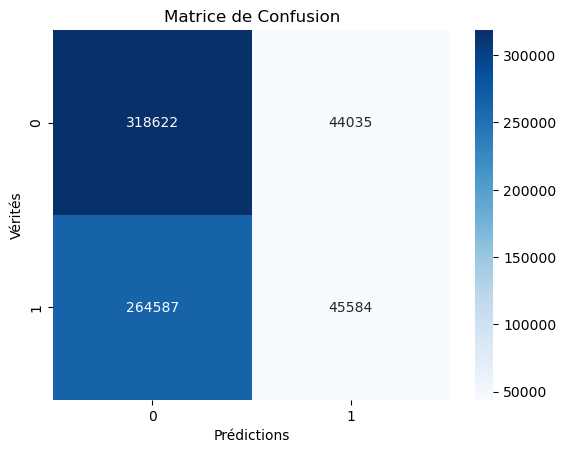

In [19]:
# Accuracy et rapport de classification
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## 8.Comparaison avec un modéle Random Forest

### Nous testons un modéle plus complexe comme Random Forest pour comparer les résultats

In [22]:
# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators = 100 ,n_jobs=-1 ,random_state=42  )
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation
print("Random Forest Accuracy :", accuracy_score(y_test, y_pred_rf))


print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy : 0.5813164731551006
              precision    recall  f1-score   support

           0       0.61      0.63      0.62    362657
           1       0.55      0.52      0.53    310171

    accuracy                           0.58    672828
   macro avg       0.58      0.58      0.58    672828
weighted avg       0.58      0.58      0.58    672828



## 9. Visualisation de l'importance des caractéristiques

### Nous identifions quelles caractéristiques ont plus d'impact sur les prédictions 

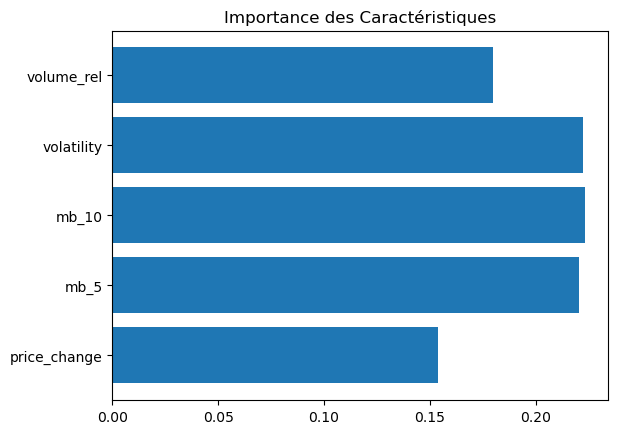

In [31]:
# Importance des caractéristiques
importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Importance des Caractéristiques")
plt.show()

## 10. Conclusion

### Dans le cadre de ce projet de prédiction de la direction du prix du Bitcoin, nous avons comparé les performances de deux modèles de machine learning : *la régression logistique* et *Random Forest*.  

### Les résultats obtenus sont les suivants :  
### - *Régression logistique* : accuracy de *0,54*.  
### - *Random Forest (n_estimators=100)* : accuracy de *0,58*.  

### Ces résultats montrent que le modèle *Random Forest* apporte une légère amélioration par rapport à la régression logistique, ce qui indique que des relations non linéaires entre les features et la cible sont présentes dans les données. Cependant, la performance globale reste relativement modeste, proche de la prédiction aléatoire (*50%*), ce qui souligne la complexité de la tâche de prédiction dans un environnement aussi volatil.

### En conclusion, ce projet a permis de poser les bases d'une approche prédictive du prix du Bitcoin à partir de données historiques et d’indicateurs techniques. Le modèle *Random Forest* a montré une meilleure capacité à capturer les tendances que la régression logistique, ouvrant la voie à des analyses plus poussées dans le futur.
 